In [57]:
from common import SparseGraph
import graphviz

In [58]:
class ApspContext:
    # all pairs shortest path
    
    MAX_DISTANCE = 99999999999999999
    
    def __init__(self, g):
        self.pred = [] # 前驱结点
        self.distance = [] # 距离
        self.g = g
        
        maxV = -1
        
        for x in g.V:
            if g.V[x].v > maxV:
                maxV = x
        
        self.N = N = maxV + 1
        
        for u in range(N):
            self.pred.append([ -1 ] * N)
            self.distance.append([ self.MAX_DISTANCE ] * N)
        
    def __str__(self):
        s = '{\n'
        s += '    pred = %s\n' % str(self.pred)
        s += '    distance = %s\n' % str(self.distance)
        s += '}\n'
        
        return s

    def drawDistance(self):
        G = graphviz.Digraph('structs', node_attr = { 'shape': 'plaintext' })

        s = '<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">'

        s += '<TR><TD> </TD>'
        for x in range(self.N):
            v = str(x)                
            s += '<TD>v%s</TD>' % v
        s += '</TR>'
        
        for x in range(self.N):
            s += '<TR><TD>v%s</TD>' % str(x)
            
            for y in range(self.N):
                v = self.distance[x][y]
                if v == self.MAX_DISTANCE:
                    v = '∞'
                elif self.g.findV(x) == None or self.g.findV(y) == None:
                    v = ''
                    
                s += '<TD>%s</TD>' % str(v)
                
            s += '</TR>'
        
        s += '</TABLE>>'

        G.node('struct1', s)
        display(G)
        
    
class AsspGraph(SparseGraph):
    
    def __init__(self):
        super(AsspGraph, self).__init__()
    
    def allPairsShortestPath(self):
        context = ApspContext(self)        
                
        for ukey in self.V:
            u = self.V[ukey]
            context.distance[u.v][u.v] = 0
            
            v = u.next
            while v is not None:
                w = v.weight
                context.distance[u.v][v.v] = w
                context.pred[u.v][v.v] = u.v
                
                v = v.next
        
        for tkey in self.V:
            t = self.V[tkey]
        
            for ukey in self.V:
                u = self.V[ukey]

                for vkey in self.V:
                    v = self.V[vkey]
                    
                    newLen = context.distance[u.v][t.v] + context.distance[t.v][v.v]                
                    if newLen < context.distance[u.v][v.v]:
                        context.distance[u.v][v.v] = newLen
                        context.pred[u.v][v.v] = context.pred[t.v][v.v]
        
        
        return context

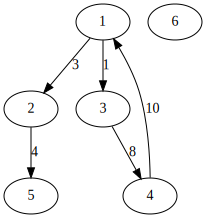

In [59]:
g = AsspGraph()
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)
g.addV(6)

g.addE(1, 2, 3)
g.addE(1, 3, 1)
g.addE(3, 4, 8)
g.addE(4, 5, 2)
g.addE(2, 5, 4)
g.addE(4, 1, 10)

g.draw(True, True)

all pairs shortest path is:


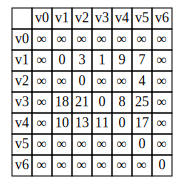

In [60]:
context = g.allPairsShortestPath()
print ('all pairs shortest path is:')

context.drawDistance()